# Temat nr 2 (Happy Customer Bank)


In [395]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

#Wczytanie danych (z zapisanego na dysku pliku)

dateparse = lambda x: pd.datetime.strptime(x, '%d-%b-%y')
dane = pd.read_csv("Train.csv", sep=',', decimal='.', parse_dates = ["Lead_Creation_Date","DOB"], 
                   date_parser=dateparse)  

#Usuwamy niepotrzebne zmienne

dane.drop(["ID"],axis=1, inplace=True) # Identyfikator nieniosący żadnej informacji
dane.drop(["LoggedIn"],axis=1, inplace=True)# Zmienna do usunięcia zgodnie z treścią zadania

In [396]:
dane.head() #Puste wartości z pliku zostały wczytane jako np.NaN - OK

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,Disbursed
0,Female,Delhi,20000,1978-05-23,2015-05-15,300000.0,5.0,0.0,CYBOSOL,HDFC Bank,...,NaN,NaN,NaN,NaN,N,Web-browser,G,S122,1,0
1,Male,Mumbai,35000,1985-10-07,2015-05-04,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),ICICI Bank,...,2.0,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0
2,Male,Panchkula,22500,1981-10-10,2015-05-19,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,State Bank of India,...,4.0,NaN,NaN,NaN,N,Web-browser,B,S143,1,0
3,Male,Saharsa,35000,1987-11-30,2015-05-09,1000000.0,5.0,0.0,BIHAR GOVERNMENT,State Bank of India,...,5.0,NaN,NaN,NaN,N,Web-browser,B,S143,3,0
4,Male,Bengaluru,100000,1984-02-17,2015-05-20,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,HDFC Bank,...,2.0,NaN,NaN,NaN,N,Web-browser,B,S134,3,0


## 1. Poglądowa analiza struktury pliku

In [397]:
print("Nazwy zmiennych:\n",dane.columns)
print("\nLiczba zmiennych objaśniająch:",dane.columns.shape[0]-1)# Wyłączam zmienną objaśnianą Disbursed

Nazwy zmiennych:
 Index(['Gender', 'City', 'Monthly_Income', 'DOB', 'Lead_Creation_Date',
       'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
       'Employer_Name', 'Salary_Account', 'Mobile_Verified', 'Var5', 'Var1',
       'Loan_Amount_Submitted', 'Loan_Tenure_Submitted', 'Interest_Rate',
       'Processing_Fee', 'EMI_Loan_Submitted', 'Filled_Form', 'Device_Type',
       'Var2', 'Source', 'Var4', 'Disbursed'],
      dtype='object')

Liczba zmiennych objaśniająch: 23


In [398]:
# 1. Gender- Sex
# 2. City - Current City
# 3. Monthly_Income - Monthly Income in rupees
# 4. DOB - Date of Birth
# 5. Lead_Creation_Date - Lead Created on date
# 6. Loan_Amount_Applied - Loan Amount Requested (INR)
# 7. Loan_Tenure_Applied - Loan Tenure Requested (in years)
# 8. Existing_EMI - EMI of Existing Loans (INR)
# 9. Employer_Name - Employer Name
# 10. Salary_Account- Salary account with Bank
# 11. Mobile_Verified - Mobile Verified (Y/N)
# 12. Var5- Continuous classified variable
# 13. Var1- Categorical variable with multiple levels
# 14. Loan_Amount_Submitted- Loan Amount Revised and Selected after seeing Eligibility
# 15. Loan_Tenure_Submitted- Loan Tenure Revised and Selected after seeing Eligibility (Years)
# 16. Interest_Rate- Interest Rate of Submitted Loan Amount
# 17. Processing_Fee- Processing Fee of Submitted Loan Amount (INR)
# 18. EMI_Loan_Submitted- EMI of Submitted Loan Amount (INR)
# 19. Filled_Form- Filled Application form post quote
# 20. Device_Type- Device from which application was made (Browser/ Mobile)
# 21. Var2- Categorical Variable with multiple Levels
# 22. Source- Categorical Variable with multiple Levels
# 23 Var4- Categorical Variable with multiple Levels

In [399]:
print("Wymiar danych:",dane.shape,"\n")
print(dane.info())

Wymiar danych: (87020, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 24 columns):
Gender                   87020 non-null object
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null datetime64[ns]
Lead_Creation_Date       87020 non-null datetime64[ns]
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null object
Var5                     87020 non-null int64
Var1                     87020 non-null object
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null fl

In [400]:
print("Struktura zmiennej objaśnianej Disbursed:\n")
print(dane.Disbursed.value_counts())
print("\nŚrednia:",dane.Disbursed.mean())

Struktura zmiennej objaśnianej Disbursed:

0    85747
1     1273
Name: Disbursed, dtype: int64

Średnia: 0.01462882096069869


## 2. Przekształcenia zmiennych na całym zbiorze

In [401]:
# Aby nie powielać tych samych kodów (na próbce treningowej oraz testowej), tam gdzie jest to możliwe
# z merytorycznego punktu widzenia, pewne przekształcenia zmiennych dokonuję na całym zbiorze

### DOB

In [402]:
# Zmienną DOB (brak NULLi) zamieniam na zmienną AGE (w latach) przy użyciu zmiennej Lead_Creation_Date
# Zmienna DOB posiada natomiast błędne wartości (w pliku csv pojawiają się daty urodzenia z 2015 roku
# oraz roku 2029). Podejrzane dane zamieniam na np.NaN
# Dodatkowo po wczytaniu zmiennej DOB do ramki pandas cześć dat 19XY wczytuje się błędnie w konwencji 20XY, 
# stąd wymagane poniżej przekształcenia:

print("Zakres DOB przed modyfikacją:",min(dane["DOB"]),max(dane["DOB"]))

dane["DOB"] = [x.year for x in dane["DOB"]]
dane["DOB"] = np.where(dane.DOB <2000, dane["DOB"], dane["DOB"]-100)
dane['DOB'] = np.where(dane.DOB >1930, dane['DOB'], np.NaN)
dane["AGE"]= 2015 - dane["DOB"] # dla wszystkich rekordów rok(Lead_Creation_Date) = 2015

print("Zakres DOB w latach po modyfikacji:",min(dane["DOB"]),max(dane["DOB"]))
print("Zakres AGE w latach:",min(dane["AGE"]),max(dane["AGE"])) # wygląda OK
print ("Liczba NULLi w zmiennej AGE:", dane.AGE.isnull().sum())

Zakres DOB przed modyfikacją: 1969-01-01 00:00:00 2068-12-29 00:00:00
Zakres DOB w latach po modyfikacji: 1932.0 1997.0
Zakres AGE w latach: 18.0 83.0
Liczba NULLi w zmiennej AGE: 18


In [403]:
# Usuwam niepotrzebne, oryginalne zmienne
dane.drop(["Lead_Creation_Date"],axis=1, inplace=True)
dane.drop(["DOB"],axis=1, inplace=True)

### Gender

In [404]:
# Zmienna nie posiada NULLi. 
dane['Gender'] = dane.Gender.replace({'Male':0, 'Female':1})

## 3. Podział danych na próbkę uczącą i treningową


In [405]:
y = dane['Disbursed']
X = dane
X.drop(["Disbursed"],axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [406]:

print ("ZBIÓR TRENINGOWY:\n")
print("Struktura zmiennej objaśnianej Disbursed:\n")
print(y_train.value_counts())
print("\nŚrednia:",y_train.mean())

print ("ZBIÓR TESTOWY:\n")
print("Struktura zmiennej objaśnianej Disbursed:\n")
print(y_test.value_counts())
print("\nŚrednia:",y_test.mean())

# WNIOSKI:
# Analiza ilości 1-dynek w zbiorze treningowym i testowym: OK, zachowane proporcje z całego zbioru
# Warto rozważyć na etapie modelowania zastosowanie techniki dla niezbilansowanych klas

ZBIÓR TRENINGOWY:

Struktura zmiennej objaśnianej Disbursed:

0    68611
1     1005
Name: Disbursed, dtype: int64

Średnia: 0.014436336474373708
ZBIÓR TESTOWY:

Struktura zmiennej objaśnianej Disbursed:

0    17136
1      268
Name: Disbursed, dtype: int64

Średnia: 0.015398758905998622


In [407]:
X_train.shape

(69616, 22)

In [408]:
X_test.shape

(17404, 22)

## 4. Analiza zmiennych typu Object na danych treningowych

### City

In [409]:
X_train.City.value_counts()

Delhi                  10068
Bengaluru               8719
Mumbai                  8664
Hyderabad               5843
Chennai                 5516
Pune                    4137
Kolkata                 2346
Ahmedabad               1411
Jaipur                  1048
Gurgaon                  954
Coimbatore               923
Thane                    709
Chandigarh               694
Surat                    622
Visakhapatnam            604
Indore                   574
Vadodara                 490
Lucknow                  474
Nagpur                   471
Ghaziabad                449
Bhopal                   416
Kochi                    397
Faridabad                362
Patna                    359
Madurai                  310
Noida                    296
Gautam Buddha Nagar      267
Dehradun                 246
Raipur                   224
Bhubaneswar              223
                       ...  
Sheopur                    1
Golaghat                   1
Poonch                     1
Madhepura     

In [410]:
print("Liczba NULLi przed uzupełnieniem braków:", X_train.City.isnull().sum()) 
X_train["City"] = X_train.City.fillna("MISSING") # uzupełniamy NULLe wartością "MISSING"
print("Liczba NULLi po uzupełnieniu braków:", X_train.City.isnull().sum()) #OK

Liczba NULLi przed uzupełnieniem braków: 804
Liczba NULLi po uzupełnieniu braków: 0


In [411]:
# Po uzupełnieniu braków danych
X_train.City.value_counts()

Delhi                  10068
Bengaluru               8719
Mumbai                  8664
Hyderabad               5843
Chennai                 5516
Pune                    4137
Kolkata                 2346
Ahmedabad               1411
Jaipur                  1048
Gurgaon                  954
Coimbatore               923
MISSING                  804
Thane                    709
Chandigarh               694
Surat                    622
Visakhapatnam            604
Indore                   574
Vadodara                 490
Lucknow                  474
Nagpur                   471
Ghaziabad                449
Bhopal                   416
Kochi                    397
Faridabad                362
Patna                    359
Madurai                  310
Noida                    296
Gautam Buddha Nagar      267
Dehradun                 246
Raipur                   224
                       ...  
SAYAN                      1
Sheopur                    1
Golaghat                   1
Madhepura     

In [412]:
# Zmienna ma za dużo kategorii, grupuję ją przy użyciu Drzewa decyzyjnego
onehot = pd.get_dummies(X_train[["City"]])
levels_grouper = DecisionTreeClassifier(min_samples_leaf=1000) # dobieram 1000 na bazie liczności miast
levels_grouper.fit(onehot, y_train) 
X_train["City-group"] = levels_grouper.apply(onehot).astype(str)

x = pd.crosstab(X_train["City"],X_train["City-group"])
x
# Pojawia się 10 nowych kategorii (od 9 do 18)

City-group,10,11,12,13,14,15,16,17,18,9
City,,,,,,,,,,
ADIPUR,0,0,0,0,0,0,0,0,0,7
AHMEDB,0,0,0,0,0,0,0,0,0,5
AMALSAD,0,0,0,0,0,0,0,0,0,1
ANJAR,0,0,0,0,0,0,0,0,0,6
Abohar,0,0,0,0,0,0,0,0,0,4
Adilabad,0,0,0,0,0,0,0,0,0,23
Agartala,0,0,0,0,0,0,0,0,0,34
Agra,0,0,0,0,0,0,0,0,0,169
Ahmedabad,0,1411,0,0,0,0,0,0,0,0


In [413]:
x.loc[["MISSING"]] # Wartość MISSING trafiła do grupy 9 (razem z innymi mniej licznymi miastami)

City-group,10,11,12,13,14,15,16,17,18,9
City,,,,,,,,,,
MISSING,0,0,0,0,0,0,0,0,0,804


In [414]:
X_train["City-group"].value_counts() 

9     21864
18    10068
16     8719
15     8664
10     5843
12     5516
17     4137
14     2346
11     1411
13     1048
Name: City-group, dtype: int64

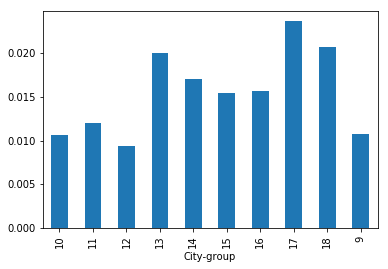

In [415]:
x = pd.crosstab(X_train["City-group"],y_train, normalize= "index") #Normalizuję po wierszach
x.iloc[:,1].plot(kind="bar") #Na wykresie pokazuję tylko procentową liczność dla Disbursed =1 (pomijam = 0)
plt.show()

In [416]:
#Usuwam zmienną City, a w jej miejsce pozostawiam zmienną City-Group
X_train.drop(["City"],axis=1, inplace=True)

### Employer_Name

In [417]:
X_train.Employer_Name.value_counts()

0                                               3974
TATA CONSULTANCY SERVICES LTD (TCS)              431
COGNIZANT TECHNOLOGY SOLUTIONS INDIA PVT LTD     319
ACCENTURE SERVICES PVT LTD                       261
GOOGLE                                           235
HCL TECHNOLOGIES LTD                             204
ICICI BANK LTD                                   192
INDIAN AIR FORCE                                 155
INFOSYS TECHNOLOGIES                             151
GENPACT                                          147
INDIAN ARMY                                      135
TYPE SLOWLY FOR AUTO FILL                        133
WIPRO TECHNOLOGIES                               130
IBM CORPORATION                                  130
IKYA HUMAN CAPITAL SOLUTIONS LTD                 117
HDFC BANK LTD                                    117
INDIAN RAILWAY                                   107
STATE GOVERNMENT                                 106
INDIAN NAVY                                   

In [418]:
print("Liczba NULLi przed uzupełnieniem braków:",X_train.Employer_Name.isnull().sum())

Liczba NULLi przed uzupełnieniem braków: 58


In [419]:
# Przyjmujemy założenie, że wartość '0' oraz np. NaN zmiennej oznacza samozatrudnienie,
# (czyli firma 1-osobowa) 
# # Przekształcamy tą zmienną do zmiennej numerycznej "Number_Of_Employees", która będzie zawierała informację
# o liczbie pracowników firmy,w której pracuje dany klient. Oczywiście bazujemy tylko na tych pracownikach,
# którzy są klientami banku, niemniej jednak nowa zmienna rozróżnia większe firmy od mniejszych
Employer_Name_slownik = X_train.Employer_Name.value_counts()
Employer_Name_slownik['0']=1
X_train['Number_Of_Employees'] = X_train.Employer_Name.map(Employer_Name_slownik).fillna(1).astype(int)

X_train.drop(["Employer_Name"],axis=1, inplace=True) # Usuwam starą zmienną

In [420]:
X_train['Number_Of_Employees'].value_counts()

1      32585
2       8714
3       4317
4       2688
5       1860
6       1470
7       1232
8       1032
9        738
12       732
10       680
11       649
13       572
15       510
18       486
17       442
431      431
22       396
24       384
14       378
19       342
319      319
16       288
23       276
33       264
261      261
130      260
37       259
235      235
117      234
       ...  
106      106
35       105
34       102
102      102
99        99
95        95
47        94
93        93
88        88
87        87
43        86
85        85
84        84
40        80
80        80
39        78
76        76
74        74
72        72
68        68
66        66
30        60
58        58
29        58
57        57
56        56
54        54
49        49
48        48
45        45
Name: Number_Of_Employees, Length: 86, dtype: int64

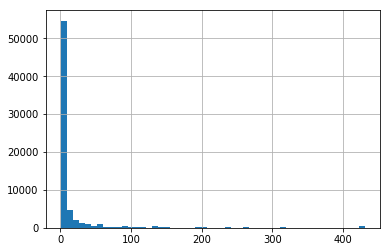

In [421]:
# Poglądowy histogram nowo-utworzonej zmiennej
X_train["Number_Of_Employees"].hist(bins=50)
plt.show()

In [422]:
print("Liczba NULLi w zmiennej Number_Of_Employees:",X_train.Number_Of_Employees.isnull().sum()) # OK

Liczba NULLi w zmiennej Number_Of_Employees: 0


In [423]:
# Z uwagi na skośność histogramu, przekształcenie log
X_train["Number_Of_Employees"]=np.log(X_train["Number_Of_Employees"])

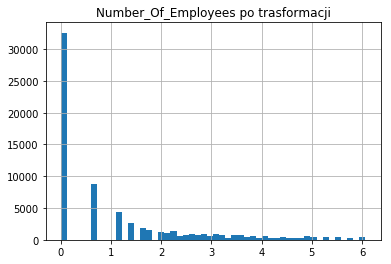

In [424]:
X_train["Number_Of_Employees"].hist(bins=50)
plt.title("Number_Of_Employees po trasformacji")
plt.show()

### Salary_Account

In [425]:
X_train.Salary_Account.value_counts()

HDFC Bank                                          14136
ICICI Bank                                         10945
State Bank of India                                 9488
Axis Bank                                           7019
Citibank                                            1900
Kotak Bank                                          1681
IDBI Bank                                           1242
Bank of India                                        952
Punjab National Bank                                 946
Bank of Baroda                                       899
Canara Bank                                          779
Standard Chartered Bank                              775
Union Bank of India                                  750
Yes Bank                                             641
ING Vysya                                            542
Corporation bank                                     536
Indian Overseas Bank                                 496
State Bank of Hyderabad        

In [426]:
print("Liczba NULLi przed uzupełnieniem braków:", X_train.Salary_Account.isnull().sum()) 

Liczba NULLi przed uzupełnieniem braków: 9451


In [427]:
X_train["Salary_Account"] = X_train.Salary_Account.fillna("OTHER") # uzupełniamy NULLe wartością "OTHER"
print("Liczba NULLi po uzupełnieniu braków:", X_train.Salary_Account.isnull().sum()) #OK

Liczba NULLi po uzupełnieniu braków: 0


In [428]:
# Grupuję zmienną Salary_Account przy użyciu drzewa decyzyjnego (logika jak przy zmiennej City)
onehot = pd.get_dummies(X_train[["Salary_Account"]])
levels_grouper = DecisionTreeClassifier(min_samples_leaf=1000) # dobieram 1000 na bazie liczności miast
levels_grouper.fit(onehot, y_train) 
X_train["Salary_Account-group"] = levels_grouper.apply(onehot).astype(str)

In [429]:
x = pd.crosstab(X_train["Salary_Account"],X_train["Salary_Account-group"])
x.loc[["OTHER"]] 

Salary_Account-group,10,11,12,13,14,15,16,8,9
Salary_Account,,,,,,,,,
OTHER,0,0,0,0,0,0,9451,0,0


In [430]:
X_train["Salary_Account-group"].value_counts() # Wartość OTHER trafiła do grupy 16 jako oddzielna grupa

13    14136
8     13754
14    10945
15     9488
16     9451
11     7019
12     1900
10     1681
9      1242
Name: Salary_Account-group, dtype: int64

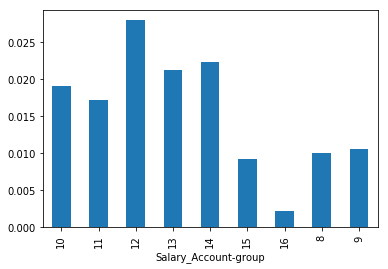

In [431]:
x = pd.crosstab(X_train["Salary_Account-group"],y_train, normalize= "index") #Normalizuję po wierszach
x.iloc[:,1].plot(kind="bar") #Na wykresie pokazuję tylko procentową liczność dla Disbursed =1 (pomijam = 0)
plt.show() # Widać, że kategoria 16 (czyli OTHER) cechuje się wyraźnie niższym odsetkiem udzielonych kredytów

In [432]:
X_train.drop(["Salary_Account"],axis=1, inplace=True) #Usuwam "starą" zmienną i pozostawiam zgrupowaną

### Mobile_Verified

Y    45151
N    24465
Name: Mobile_Verified, dtype: int64


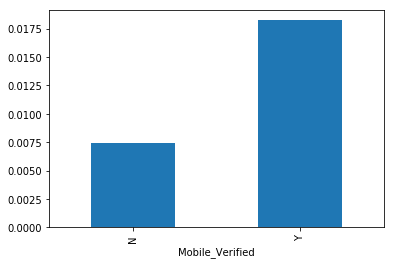

In [433]:
# Zmienna nie posiada NULLi. Intuicyjnie wydaje się, że zmienna nie powinna mieć wpływu na wartość objaśnianą,
# ale pozostawiam ją na razie z uwagi na fakt, że różnicuje kredyty udzielone od nieudzielonych
print(X_train.Mobile_Verified.value_counts())
x = pd.crosstab(X_train["Mobile_Verified"],y_train, normalize= "index") #Normalizuję po wierszach
x.iloc[:,1].plot(kind="bar") #Na wykresie pokazuję tylko procentową liczność dla Disbursed =1 (pomijam = 0)
plt.show()

### Var1

In [434]:
# Zmienna nie posiada NULLi, oryginalnie posiada dużo kategorii (w konsekwencji dużo zmiennych one hotowych)
X_train.Var1.value_counts()

HBXX    47504
HBXC     7249
HBXB     3564
HAXA     2320
HBXA     1687
HAXB     1574
HBXD     1543
HAXC     1231
HBXH      787
HCXF      583
HAYT      403
HAVC      301
HAXM      212
HCYS      180
HCXD      170
HVYS      143
HAZD       90
HCXG       62
HAXF       13
Name: Var1, dtype: int64

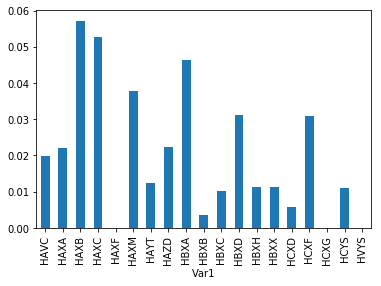

In [435]:
x = pd.crosstab(X_train["Var1"],y_train, normalize= "index") #Normalizuję po wierszach
x.iloc[:,1].plot(kind="bar") #Na wykresie pokazuję tylko procentową liczność dla Disbursed =1 (pomijam = 0)
plt.show()

In [436]:
# Grupuję ekspercko zmienną Var1 w 7 podgrup na bazie zaobserwowanego odsetku kredytów udzielonych 
# w poszczególnych grupach
X_train['Var1_group'] = X_train.Var1.map({'HVYS': 'a','HCXG':'a', 'HAXF':'a', 'HBXB':'a', #Disbursed_mean ~ 0
                               'HCXD':'b','HCYS':'b','HBXC':'b',
                               'HBXH':'b','HAYT':'b','HBXX':'b',
                               'HAZD':'c','HAVC':'c','HAXA':'c',
                               'HCXF':'d','HBXD':'d',
                               'HAXM':'e',
                               'HBXA':'f',
                               'HAXB':'g','HAXC':'g'})

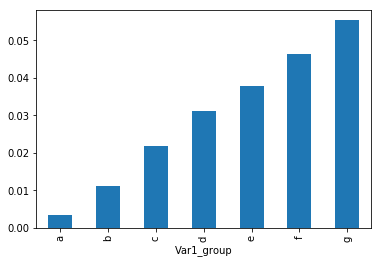

In [437]:
# Patrzę na odsetek kredytów udzielonych w zmiennej Var1_group, wygląda dobrze (grupy są zróżnicowane)
x = pd.crosstab(X_train["Var1_group"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()

In [438]:
X_train.drop(["Var1"],axis=1, inplace=True) #Usuwać oryginalną zmienną

### Filled_Form

N    54049
Y    15567
Name: Filled_Form, dtype: int64


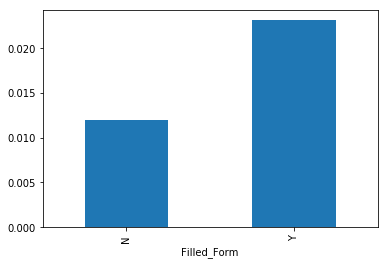

In [439]:
# Zmienna nie posiada NULLi. Odsetek kredytów udzielonych jest różny dla wartości Yes oraz No
print(X_train.Filled_Form.value_counts())
x = pd.crosstab(X_train["Filled_Form"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()


### Device Type

Web-browser    51482
Mobile         18134
Name: Device_Type, dtype: int64


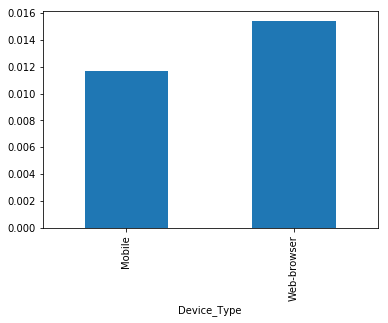

In [440]:
# Zmienna nie posiada NULLi. Nie różnicuje istotnie kredytów, ale na razie ją pozostawiam
print(X_train.Device_Type.value_counts())
x = pd.crosstab(X_train["Device_Type"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()

### Var2

B    29869
G    26452
C    11313
E     1038
D      509
F      432
A        3
Name: Var2, dtype: int64


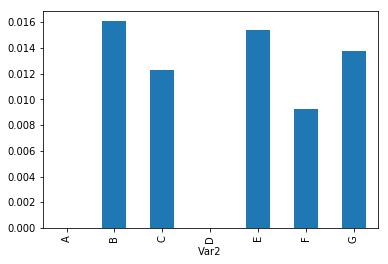

In [441]:
# Zmienna nie posiada NULLi
print(X_train.Var2.value_counts())
x = pd.crosstab(X_train["Var2"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()

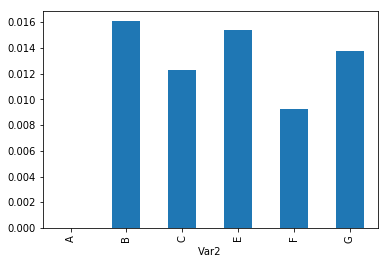

In [442]:
# Widać, że zarówno dla grupy A jak D odsetek kredytów udzielonych wynosi 0, dlatego łączę je w jedną "A":
X_train['Var2'] = np.where(X_train['Var2']=='D', 'A', X_train['Var2'])
# Sprawdzenie po pogrupowaniu: OK
x = pd.crosstab(X_train["Var2"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()

### Source

In [443]:
# Zmienna nie posiada NULLi, ale kategorii jest bardzo dużo.
X_train.Source.value_counts()

S122    30912
S133    23801
S159     4481
S143     3480
S127     1566
S137     1381
S134     1031
S161      611
S151      574
S157      522
S153      408
S156      245
S144      242
S158      170
S123       64
S141       47
S162       26
S124       20
S150        9
S160        8
S136        3
S129        3
S139        3
S135        2
S155        2
S140        1
S138        1
S125        1
S154        1
S130        1
Name: Source, dtype: int64

In [444]:
# Grupuję zmienną przy użyciu drzewa decyzyjnego (analogicznie jak dla zmiennej City)
onehot = pd.get_dummies(X_train[["Source"]])
levels_grouper = DecisionTreeClassifier(min_samples_leaf=1200) # dobieram 1200 na bazie liczności zmiennej
levels_grouper.fit(onehot, y_train) 
X_train["Source-group"] = levels_grouper.apply(onehot).astype(str)

7     30912
8     23801
12     4481
6      3995
9      3480
10     1566
11     1381
Name: Source-group, dtype: int64


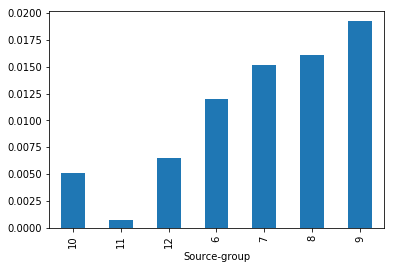

In [445]:
print(X_train["Source-group"].value_counts()) #Powstało 7 grup
x = pd.crosstab(X_train["Source-group"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()

In [446]:
y = pd.crosstab(X_train["Source"],X_train["Source-group"])
y

Source-group,10,11,12,6,7,8,9
Source,,,,,,,
S122,0,0,0,0,30912,0,0
S123,0,0,0,64,0,0,0
S124,0,0,0,20,0,0,0
S125,0,0,0,1,0,0,0
S127,1566,0,0,0,0,0,0
S129,0,0,0,3,0,0,0
S130,0,0,0,1,0,0,0
S133,0,0,0,0,0,23801,0
S134,0,0,0,1031,0,0,0


In [447]:
X_train.drop(["Source"],axis=1, inplace=True) # Usuwam oryginalną zmienną

### Var4

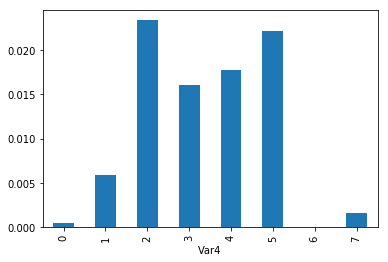

In [448]:
# Z opisu Var4- Categorical Variable with multiple Levels ale zmienna wczytuje się jako int!
# Datego zamieniam ją na string. Kategorii jest 8, pozostawiam zmienną bez dodatkowego grupowania
X_train['Var4'] = X_train.Var4.astype('str')
x = pd.crosstab(X_train["Var4"],y_train, normalize= "index") 
x.iloc[:,1].plot(kind="bar") 
plt.show()

In [449]:
X_train['Var4'].value_counts()

3    20241
1    19143
5    16201
4     5234
2     4710
0     2046
7     1852
6      189
Name: Var4, dtype: int64

## 5. Analiza zmiennych numerycznych na danych treningowych

In [450]:
X_train.describe() 

,Gender,Monthly_Income,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Var5,Loan_Amount_Submitted,Loan_Tenure_Submitted,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,AGE,Number_Of_Employees
count,69616.000000,6.961600e+04,6.955800e+04,69558.000000,6.955800e+04,69616.000000,4.185700e+04,41857.000000,22112.000000,21861.000000,22112.000000,69600.000000,69616.000000
mean,0.427402,5.521687e+04,2.313030e+05,2.135283,3.742334e+03,4.958386,3.947356e+05,3.890747,19.203373,5116.949499,10971.971223,30.883333,1.162928
std,0.494705,1.704543e+06,3.575029e+05,2.014950,4.420452e+04,5.670133,3.082988e+05,1.164953,5.833158,4695.040303,7465.508516,7.082282,1.507421
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,5.000000e+04,1.000000,11.990000,200.000000,1185.560000,18.000000,0.000000
25%,0.000000,1.650000e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,2.000000e+05,3.000000,15.250000,2000.000000,6513.610000,26.000000,0.000000
50%,0.000000,2.500000e+04,1.000000e+05,2.000000,0.000000e+00,2.000000,3.000000e+05,4.000000,18.000000,3900.000000,9392.970000,29.000000,0.693147
75%,1.000000,4.000000e+04,3.000000e+05,4.000000,3.500000e+03,11.000000,5.000000e+05,5.000000,20.000000,6250.000000,12862.545000,34.000000,1.945910
max,1.000000,3.838384e+08,1.000000e+07,10.000000,1.000000e+07,18.000000,3.000000e+06,6.000000,37.000000,50000.000000,144748.280000,83.000000,6.066108


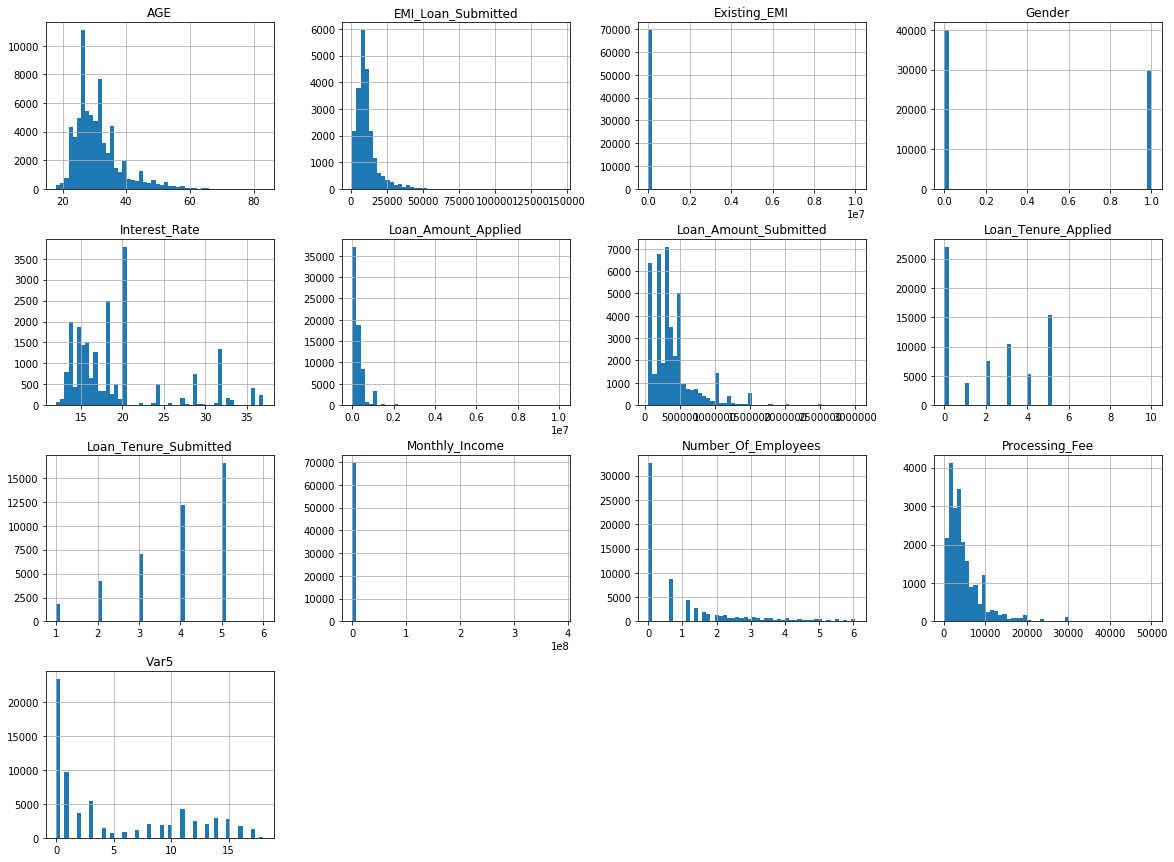

In [451]:
# Histogramy poszczególnych zmiennych numerycznych
X_train.hist(bins=50,figsize = (20,15))
plt.show()

### Monthly_Income

In [452]:
# Brak NULLi w zmiennej
print("Liczba NULLi w zmiennej:", X_train.Monthly_Income.isnull().sum())

Liczba NULLi w zmiennej: 0


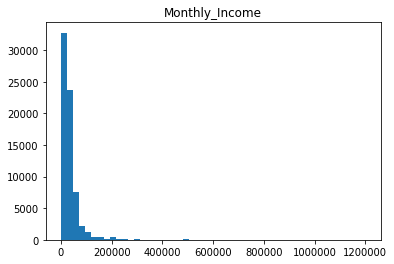

In [453]:
# Histogram zmiennej Monthly_Income jest zdominowany przez obserwacje z wysokimi wartościami
# (które mają sens, bo osoby te zaciągnęły bardzo duże kwoty kredytu).
# Poniżej histogram pozwalający ocenić wystąpienie skośności (WYSTĘPUJE) w tej zmiennej
plt.hist(X_train["Monthly_Income"], bins = 50, range=(0, np.percentile(X_train["Monthly_Income"],99.9)))
plt.title("Monthly_Income")
plt.show()

In [454]:
# Z uwagi na skośność wymagane przekształcenie log zmiennej
X_train["Monthly_Income"] = np.where(X_train["Monthly_Income"]==0, 0,np.log(X_train["Monthly_Income"]))

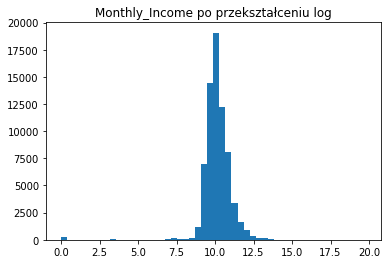

In [455]:
plt.hist(X_train["Monthly_Income"], bins=50)
plt.title("Monthly_Income po przekształceniu log")
plt.show()

### Existing_EMI

In [456]:
# Analiza NULLi w zmiennej
print("Liczba NULLi w zmiennej przed wypełnieniem:", X_train.Existing_EMI.isnull().sum())
# Na histogramie tej zmiennej widać, że najczęściej występująca wartość tej zmiennej to 0.
# Braki uzupełniamy tą wartością 0
X_train["Existing_EMI"] = X_train.Existing_EMI.fillna(0)
print("Liczba NULLi po uzupełnieniu braków:", X_train.Existing_EMI.isnull().sum())

Liczba NULLi w zmiennej przed wypełnieniem: 58
Liczba NULLi po uzupełnieniu braków: 0


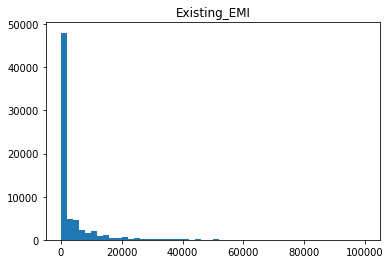

In [457]:
# Występowanie obserwacji o wysokich wartościach uniemożliwia wizualną ocenę kształtu histogramu
# Podejście analogiczne do zmiennej Monthly_income
plt.hist(X_train["Existing_EMI"], bins = 50, range=(0, np.percentile(X_train["Existing_EMI"],99.9)))
plt.title("Existing_EMI")
plt.show()

In [458]:
# Rozkład jest skośny, jednak zdominowany przez wartość 0, dlatego nie dokonuję dalszych przekształceń
# na tej zmiennej


### AGE

In [459]:
# Analiza NULLi w zmiennej
print("Liczba NULLi w zmiennej przed wypełnieniem:", X_train.AGE.isnull().sum())

Liczba NULLi w zmiennej przed wypełnieniem: 16


In [460]:
# Uzupełniamy braki medianą, średnia jest wrażliwa na obserwacje odstające
AGE_median = X_train["AGE"].median()
print ("Mediana wynosi:", AGE_median)
X_train["AGE"]=X_train.AGE.fillna(AGE_median)
print("Liczba NULLi w zmiennej po wypełnieniu:", X_train.AGE.isnull().sum())

Mediana wynosi: 29.0
Liczba NULLi w zmiennej po wypełnieniu: 0


In [461]:
# Histogram zmiennej AGE jest skośny, stąd przekształcenie log
X_train["AGE"]=np.log(X_train["AGE"])

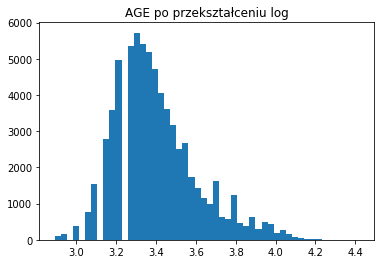

In [462]:
plt.hist(X_train["AGE"], bins=50)
plt.title("AGE po przekształceniu log")
plt.show()

### EMI_Loan_Submitted, Processing_Fee, Interest_Rate

In [463]:
# Analiza NULLi w zmiennych
print("Ilość NULLi w zmiennej EMI_Loan_Submitted:",
     X_train.EMI_Loan_Submitted.isnull().sum())
print("% NULLi w zmiennej EMI_Loan_Submitted:",
     X_train.EMI_Loan_Submitted.isnull().sum()/X_train.shape[0])
print("Ilość NULLi w zmiennej Processing_Fee:",
     X_train.Processing_Fee.isnull().sum())
print("% NULLi w zmiennej Processing_Fee:",
     X_train.Processing_Fee.isnull().sum()/X_train.shape[0])
print("Ilość NULLi w zmiennej Interest_Rate:",
     X_train.Interest_Rate.isnull().sum())
print("% NULLi w zmiennej Interest_Rate:",
     X_train.Interest_Rate.isnull().sum()/X_train.shape[0])

Ilość NULLi w zmiennej EMI_Loan_Submitted: 47504
% NULLi w zmiennej EMI_Loan_Submitted: 0.6823718685359688
Ilość NULLi w zmiennej Processing_Fee: 47755
% NULLi w zmiennej Processing_Fee: 0.6859773615260859
Ilość NULLi w zmiennej Interest_Rate: 47504
% NULLi w zmiennej Interest_Rate: 0.6823718685359688


In [464]:
#Ponieważ powyższe zmienne mają bardzo dużo NULLi zamieniamy je na zmienne binarne (0 dla NULL, 1 dla <> NULL)
X_train["EMI_Loan_Submitted"]=np.where(X_train["EMI_Loan_Submitted"].isna(),0,1)
X_train["Processing_Fee"]=np.where(X_train["Processing_Fee"].isna(),0,1)
X_train["Interest_Rate"]=np.where(X_train["Interest_Rate"].isna(),0,1)

In [465]:
#Sprawdzenie po transformacji (OK)
print("EMI_Loan_Submitted:\n",X_train["EMI_Loan_Submitted"].value_counts())
print("Processing_Fee:\n",X_train["Processing_Fee"].value_counts())
print("Interest_Rate:\n",X_train["Interest_Rate"].value_counts())

EMI_Loan_Submitted:
 0    47504
1    22112
Name: EMI_Loan_Submitted, dtype: int64
Processing_Fee:
 0    47755
1    21861
Name: Processing_Fee, dtype: int64
Interest_Rate:
 0    47504
1    22112
Name: Interest_Rate, dtype: int64


### Loan_Amount_Applied, Loan_Amount_Submitted

In [466]:
print("Ilość NULLi w zmiennej Loan_Amount_Applied:",X_train.Loan_Amount_Applied.isnull().sum())
print("Ilość NULLi w zmiennej Loan_Amount_Submitted:",X_train.Loan_Amount_Submitted.isnull().sum())

Ilość NULLi w zmiennej Loan_Amount_Applied: 58
Ilość NULLi w zmiennej Loan_Amount_Submitted: 27759


In [467]:
# W pierwszej kolejności uzupełniam braki w zmiennych zerami
X_train["Loan_Amount_Applied"] = X_train.Loan_Amount_Applied.fillna(0)
X_train["Loan_Amount_Submitted"] = X_train.Loan_Amount_Submitted.fillna(0)

In [468]:
print("Ilość NULLi w zmiennej Loan_Amount_Applied po wypełnieniu:",
      X_train.Loan_Amount_Applied.isnull().sum())
print("Ilość NULLi w zmiennej Loan_Amount_Submitted po wypełnieniu:",
      X_train.Loan_Amount_Submitted.isnull().sum())

Ilość NULLi w zmiennej Loan_Amount_Applied po wypełnieniu: 0
Ilość NULLi w zmiennej Loan_Amount_Submitted po wypełnieniu: 0


In [469]:
# W następnej kolejności staramy się uzupełnić zerowe wartości jednej zmiennej 
# przy użyciu wartości drugiej zmiennej. 
# Szukamy stosunku zmiennej Loan_Amount_Submitted do Loan_Amount_Applied, bazując na wierszach, które mają
# sens merytoryczny (Loan_Amount_Submitted <=Loan_Amount_Applied), oczywiście pomijam 0
Zbior_roboczy = X_train[X_train.Loan_Amount_Applied>0]
Zbior_roboczy = Zbior_roboczy[Zbior_roboczy.Loan_Amount_Submitted>0]
Zbior_roboczy = Zbior_roboczy[Zbior_roboczy.Loan_Amount_Submitted <= Zbior_roboczy.Loan_Amount_Applied]
print("Liczba wierszy w Zbiorze roboczym:",Zbior_roboczy.shape[0])

Liczba wierszy w Zbiorze roboczym: 26329


In [470]:
Mean_Applied = np.mean(Zbior_roboczy.Loan_Amount_Applied)
Mean_Submitted = np.mean(Zbior_roboczy.Loan_Amount_Submitted)
Iloraz = Mean_Submitted/Mean_Applied
print("Średnia z Loan_Amount_Applied:",np.round(Mean_Applied,2))
print("Średnia z Loan_Amount_Submitted:",np.round(Mean_Submitted,2))
print("Iloraz = Loan_Amount_Submitted/Loan_Amount_Applied:",np.round(Iloraz,4))

Średnia z Loan_Amount_Applied: 376828.86
Średnia z Loan_Amount_Submitted: 329461.81
Iloraz = Loan_Amount_Submitted/Loan_Amount_Applied: 0.8743


In [471]:
# Uzupełniam zmienną Loan_Amount_Applied za pomocą zmiennej Loan_Amount_Submitted
def Imputer_Loan_Amount_Applied(data):
        if (data["Loan_Amount_Applied"]==0 and data["Loan_Amount_Submitted"]>0 ):
            return data["Loan_Amount_Submitted"]/Iloraz
        else:
            return data["Loan_Amount_Applied"]
X_train["Loan_Amount_Applied"] = X_train.apply(Imputer_Loan_Amount_Applied, axis=1)

In [472]:
# Uzupełniam zmienną Loan_Amount_Submitted za pomocą zmiennej Loan_Amount_Applied
def Imputer_Loan_Amount_Submitted(data):
        if (data["Loan_Amount_Submitted"]==0 and data["Loan_Amount_Applied"]>0 ):
            return data["Loan_Amount_Applied"]*Iloraz
        else:
            return data["Loan_Amount_Submitted"]
X_train["Loan_Amount_Submitted"] = X_train.apply(Imputer_Loan_Amount_Submitted, axis=1)

In [473]:
# Jeżeli zarówno Loan_Amount_Applied i Loan_Amount_Submitted = 0, to tak je pozostawiam (nie robię nic)
# Sprawdzam ile tych wartości zostało:
Tmp = X_train[X_train.Loan_Amount_Applied==0]
Tmp = Tmp[Tmp.Loan_Amount_Submitted==0]
print ("Pozostało par (0,0):",Tmp.shape[0])

Pozostało par (0,0): 8320


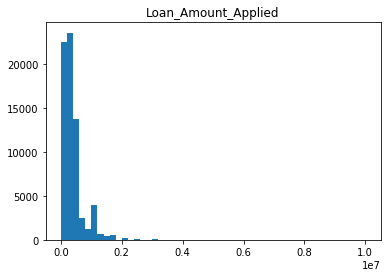

In [474]:
# Badam skośność zmiennych po uzupełnieniu
plt.hist(X_train.Loan_Amount_Applied, bins=50)
plt.title("Loan_Amount_Applied")
plt.show()

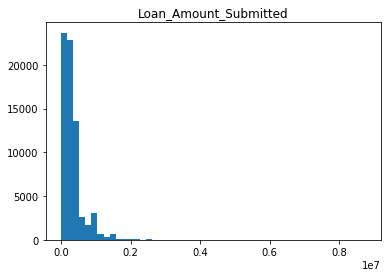

In [475]:
plt.hist(X_train.Loan_Amount_Submitted, bins=50)
plt.title("Loan_Amount_Submitted")
plt.show()

In [476]:
# Przekształcamy obie zmienne transformacją log
X_train.Loan_Amount_Applied=np.where(X_train.Loan_Amount_Applied==0,0,
                                     np.log(X_train.Loan_Amount_Applied))
X_train.Loan_Amount_Submitted=np.where(X_train.Loan_Amount_Submitted==0,0,
                                       np.log(X_train.Loan_Amount_Submitted))

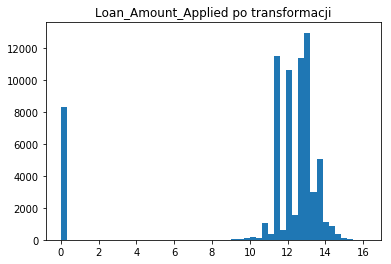

In [477]:
plt.hist(X_train.Loan_Amount_Applied, bins=50) # ZASTANOWIĆ SIĘ CZY TO JEST DOBRZE
plt.title("Loan_Amount_Applied po transformacji")
plt.show()

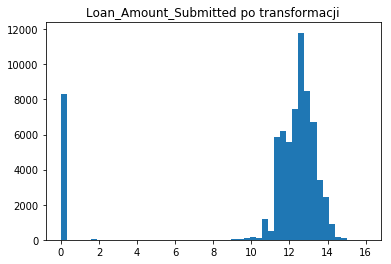

In [478]:
plt.hist(X_train.Loan_Amount_Submitted, bins=50)
plt.title("Loan_Amount_Submitted po transformacji")
plt.show()

### Loan_Tenure_Applied, Loan_Tenure_Submitted

In [479]:
print("Ilość NULLi w zmiennej Loan_Tenure_Applied:",X_train.Loan_Tenure_Applied.isnull().sum())
print("Ilość NULLi w zmiennej Loan_Tenure_Submitted:",X_train.Loan_Tenure_Submitted.isnull().sum())

Ilość NULLi w zmiennej Loan_Tenure_Applied: 58
Ilość NULLi w zmiennej Loan_Tenure_Submitted: 27759


In [480]:
# W pierwszej kolejności uzupełniam braki w zmiennych zerami
X_train["Loan_Tenure_Applied"] = X_train.Loan_Tenure_Applied.fillna(0)
X_train["Loan_Tenure_Submitted"] = X_train.Loan_Tenure_Submitted.fillna(0)
print("Ilość NULLi w zmiennej Loan_Tenure_Applied po wypełnieniu:",
      X_train.Loan_Tenure_Applied.isnull().sum())
print("Ilość NULLi w zmiennej Loan_Tenure_Submitted po wypełnieniu:",
      X_train.Loan_Tenure_Submitted.isnull().sum())

Ilość NULLi w zmiennej Loan_Tenure_Applied po wypełnieniu: 0
Ilość NULLi w zmiennej Loan_Tenure_Submitted po wypełnieniu: 0


In [481]:
# Analizuję zależność pomiędzy zmiennymi Loan_Tenure_Applied oraz Loan_Tenure_Submitted
Zbior_roboczy = X_train[X_train.Loan_Tenure_Applied>0]
Zbior_roboczy = Zbior_roboczy[Zbior_roboczy.Loan_Tenure_Submitted>0]
Zbior_roboczy = Zbior_roboczy[Zbior_roboczy.Loan_Tenure_Submitted <= Zbior_roboczy.Loan_Tenure_Applied]
print("Liczba wierszy w Zbiorze roboczym:",Zbior_roboczy.shape[0])

Liczba wierszy w Zbiorze roboczym: 24548


In [482]:
# Analogicznie jak dla zmiennych Loan_Amount_Applied/Submitted badam zależność pomiędzy tymi zmiennymi
Mean_Tenure_Applied = np.mean(Zbior_roboczy.Loan_Tenure_Applied)
Mean_Tenure_Submitted = np.mean(Zbior_roboczy.Loan_Tenure_Submitted)
Iloraz_Tenure = Mean_Tenure_Submitted/Mean_Tenure_Applied
print("Średnia z Loan_Tenure_Applied:",np.round(Mean_Tenure_Applied,2))
print("Średnia z Loan_Tenure_Submitted:",np.round(Mean_Tenure_Submitted,2))
print("Iloraz_Tenure = Loan_Tenure_Submitted/Loan_Tenure_Applied:",np.round(Iloraz_Tenure,4))

Średnia z Loan_Tenure_Applied: 3.56
Średnia z Loan_Tenure_Submitted: 3.55
Iloraz_Tenure = Loan_Tenure_Submitted/Loan_Tenure_Applied: 0.9962


In [483]:
# Wniosek jest taki, że zależność jest praktycznie 1:1

In [484]:
# Uzupełniam zmienną Loan_Tenure_Applied za pomocą zmiennej Loan_Tenure_Submitted
def Imputer_Loan_Tenure_Applied(data):
        if (data["Loan_Tenure_Applied"]==0 and data["Loan_Tenure_Submitted"]>0 ):
            return data["Loan_Tenure_Submitted"]
        else:
            return data["Loan_Tenure_Applied"]
X_train["Loan_Tenure_Applied"] = X_train.apply(Imputer_Loan_Tenure_Applied, axis=1)

In [485]:
# Uzupełniam zmienną Loan_Tenure_Submitted za pomocą zmiennej Loan_Tenure_Applied
def Imputer_Loan_Tenure_Submitted(data):
        if (data["Loan_Tenure_Submitted"]==0 and data["Loan_Tenure_Applied"]>0 ):
            return data["Loan_Tenure_Applied"]
        else:
            return data["Loan_Tenure_Submitted"]
X_train["Loan_Tenure_Submitted"] = X_train.apply(Imputer_Loan_Tenure_Submitted, axis=1)

In [486]:
# Jeżeli zarówno Loan_Tenure_Applied i Loan_Tenure_Submitted = 0, to tak je pozostawiam (nie robię nic)
# Sprawdzam ile tych wartości zostało:
Tmp = X_train[X_train.Loan_Tenure_Applied==0]
Tmp = Tmp[Tmp.Loan_Tenure_Submitted==0]
print ("Pozostało par (0,0):",Tmp.shape[0])

Pozostało par (0,0): 10396


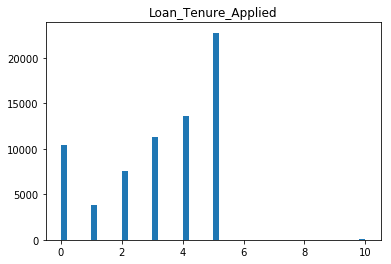

In [487]:
# Badam histogramy po uzupełnieniu zmiennyc
plt.hist(X_train.Loan_Tenure_Applied, bins=50)
plt.title("Loan_Tenure_Applied")
plt.show()

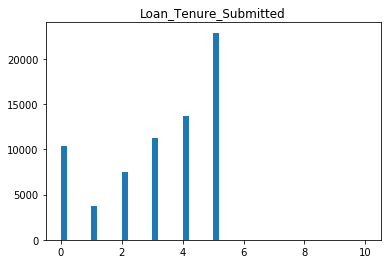

In [488]:
plt.hist(X_train.Loan_Tenure_Submitted, bins=50)
plt.title("Loan_Tenure_Submitted")
plt.show()

### Var5

In [489]:
# Zmienna nie posiada NULLi
# Patrząc na histogram, zmienna nie wymaga przekształceń
print("Ilość NULLi w zmiennej Var5:",X_train.Var5.isnull().sum())

Ilość NULLi w zmiennej Var5: 0


In [490]:
# Sprawdzamy na końcu czy mamy jeszcze jakieś NULLe w X_train(OK, już nie ma NULLI)
X_train.isnull().values.any()

False

In [491]:
X_train.shape

(69616, 22)

In [492]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69616 entries, 65322 to 15725
Data columns (total 22 columns):
Gender                   69616 non-null int64
Monthly_Income           69616 non-null float64
Loan_Amount_Applied      69616 non-null float64
Loan_Tenure_Applied      69616 non-null float64
Existing_EMI             69616 non-null float64
Mobile_Verified          69616 non-null object
Var5                     69616 non-null int64
Loan_Amount_Submitted    69616 non-null float64
Loan_Tenure_Submitted    69616 non-null float64
Interest_Rate            69616 non-null int64
Processing_Fee           69616 non-null int64
EMI_Loan_Submitted       69616 non-null int64
Filled_Form              69616 non-null object
Device_Type              69616 non-null object
Var2                     69616 non-null object
Var4                     69616 non-null object
AGE                      69616 non-null float64
City-group               69616 non-null object
Number_Of_Employees      69616 non-null

In [493]:
#X_train.to_csv('X_train.csv')

In [494]:
X_train = pd.get_dummies(X_train,drop_first=True) #Zamieniam zmienne object na one-hoty

In [495]:
X_train.shape

(69616, 57)

In [496]:
#X_train.to_csv('X_train_dummies.csv',index=False)

## 6. Przygotowanie danych testowych

In [497]:
# Dane testowe przekształcamy w oparciu o odpowiednie przekształcenia wprowadzone na danych treningowych

In [498]:
X_test.shape

(17404, 22)

In [499]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17404 entries, 47999 to 34446
Data columns (total 22 columns):
Gender                   17404 non-null int64
City                     17205 non-null object
Monthly_Income           17404 non-null int64
Loan_Amount_Applied      17391 non-null float64
Loan_Tenure_Applied      17391 non-null float64
Existing_EMI             17391 non-null float64
Employer_Name            17391 non-null object
Salary_Account           15091 non-null object
Mobile_Verified          17404 non-null object
Var5                     17404 non-null int64
Var1                     17404 non-null object
Loan_Amount_Submitted    10550 non-null float64
Loan_Tenure_Submitted    10550 non-null float64
Interest_Rate            5614 non-null float64
Processing_Fee           5559 non-null float64
EMI_Loan_Submitted       5614 non-null float64
Filled_Form              17404 non-null object
Device_Type              17404 non-null object
Var2                     17404 non-null

### Gender: nie wymaga przekształceń

### City

In [500]:
print("Liczba NULLi przed uzupełnieniem braków:", X_test.City.isnull().sum()) 
X_test["City"] = X_test.City.fillna("MISSING") # uzupełniamy NULLe wartością "MISSING"
print("Liczba NULLi po uzupełnieniu braków:", X_test.City.isnull().sum()) #OK

Liczba NULLi przed uzupełnieniem braków: 199
Liczba NULLi po uzupełnieniu braków: 0


In [501]:
# Na bazie grupowania powstałego na zmiennych treningowych
X_test["City-group"]=X_test["City"].map({"Delhi":'18',\
                                                                    "Bengaluru":'16',\
                                                                    "Mumbai":'15',\
                                                                    "Hyderabad":'10',\
                                                                    "Chennai":'12',\
                                                                    "Pune":'17',\
                                                                     "Kolkata":'14',\
                                                                     "Ahmedabad":'11',\
                                                                     "Jaipur":'13'}).astype(str)

X_test["City-group"]=X_test["City-group"].apply(lambda x: 9 if x=="nan" else x).astype(str)

In [502]:
X_test["City-group"].value_counts()

9     5608
18    2459
15    2131
16    2105
10    1429
12    1400
17    1070
14     542
11     377
13     283
Name: City-group, dtype: int64

In [503]:
X_test.drop(["City"],axis=1, inplace=True) # Usuwam starą zmienną

### Employer Name

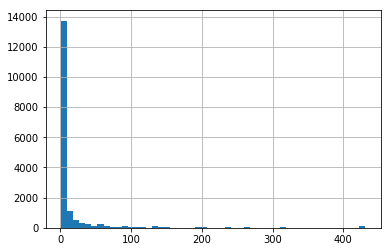

In [504]:
#Wykorzystujemy słownik zbudowany na zmiennych treningowych
X_test["Number_Of_Employees"] = X_test.Employer_Name.map(Employer_Name_slownik).fillna(1).astype(int)
# Poglądowy histogram nowo-utworzonej zmiennej
X_test["Number_Of_Employees"].hist(bins=50)
plt.show()

In [505]:
X_test["Number_Of_Employees"] = np.log(X_test["Number_Of_Employees"])
X_test.drop(["Employer_Name"],axis=1, inplace=True) # Usuwam starą zmienną

### Salary Account

In [506]:
X_test["Salary_Account"] = X_test.Salary_Account.fillna("OTHER")

In [507]:
# Na bazie grupowania powstałego na zmiennych treningowych
X_test["Salary_Account-group"]=X_test["Salary_Account"].map({"HDFC Bank":'13',\
                                                                    "ICICI Bank":'14',\
                                                                    "State Bank of India":'15',\
                                                                    "Axis Bank":'11',\
                                                                    "Citibank":'12',\
                                                                    "Kotak Bank":'10',\
                                                                     "IDBI Bank":'9',\
                                                                     "OTHER":'16'}).astype(str)

X_test["Salary_Account-group"]=X_test["Salary_Account-group"].apply(lambda x:\
                                                                    8 if x=="nan" else x).astype(str)

In [508]:
X_test["Salary_Account-group"].value_counts()

13    3559
8     3552
14    2691
15    2355
16    2313
11    1764
12     476
10     386
9      308
Name: Salary_Account-group, dtype: int64

In [509]:
X_test.drop(["Salary_Account"],axis=1, inplace=True) #Usuwam "starą" zmienną i pozostawiam zgrupowaną

### Mobile Vierified: nie wymaga przekształceń

### Var1

In [510]:
#Korzystam z mappowania określonego na bazie danych treningowych
X_test['Var1_group'] = X_test.Var1.map({'HVYS': 'a','HCXG':'a', 'HAXF':'a', 'HBXB':'a', 
                               'HCXD':'b','HCYS':'b','HBXC':'b',
                               'HBXH':'b','HAYT':'b','HBXX':'b',
                               'HAZD':'c','HAVC':'c','HAXA':'c',
                               'HCXF':'d','HBXD':'d',
                               'HAXM':'e',
                               'HBXA':'f',
                               'HAXB':'g','HAXC':'g'})

In [511]:
X_test['Var1_group'].value_counts()

b    13943
a      976
g      742
c      691
d      560
f      436
e       56
Name: Var1_group, dtype: int64

In [512]:
X_test['Var1_group'].isnull().sum() # Nie ma innych wartości w zbiorze testowym

0

In [513]:
X_test.drop(["Var1"],axis=1, inplace=True) #Usuwać oryginalną zmienną

### Filled_Form: nie wymaga przekształceń

### Device_Type: nie wymaga przekształceń

### Var2

In [514]:
X_test['Var2'] = np.where(X_test['Var2']=='D', 'A', X_test['Var2'])

In [515]:
X_test['Var2'].value_counts() #OK, nie ma innych wartości niż w zbiorze treningowym

B    7411
G    6580
C    2897
E     277
A     127
F     112
Name: Var2, dtype: int64

### Source

In [516]:
# Na bazie grupowania powstałego na zmiennych treningowych
X_test["Source-group"]=X_test["Source"].map({"S122":'7',\
                                                                    "S133":'8',\
                                                                    "S159":'12',\
                                                                    "S143":'9',\
                                                                    "S127":'10',\
                                                                    "S137":'11'}).astype(str)

X_test["Source-group"]=X_test["Source-group"].apply(lambda x:\
                                                                    6 if x=="nan" else x).astype(str)

In [517]:
X_test["Source-group"].value_counts()

7     7655
8     6084
12    1118
6      987
9      852
10     365
11     343
Name: Source-group, dtype: int64

In [518]:
X_test.drop(["Source"],axis=1, inplace=True) #Usuwać oryginalną zmienną

### Var4

In [519]:
X_test['Var4'] = X_test.Var4.astype('str')

### Monthly_Income

In [520]:
X_test["Monthly_Income"] = np.where(X_test["Monthly_Income"]==0, 0,np.log(X_test["Monthly_Income"]))

### Existing_EMI

In [521]:
X_test["Existing_EMI"] = X_test.Existing_EMI.fillna(0)

### AGE

In [522]:
X_test["AGE"].isnull().sum()#Sprawdzam czy są NULLE

2

In [523]:
X_test["AGE"]=X_test.AGE.fillna(AGE_median) #AGE_median liczone na danych treningowych
X_test["AGE"].isnull().sum()

0

In [524]:
X_test["AGE"]=np.log(X_test["AGE"])

### EMI_Loan_Submitted, Processing_Fee, Interest_Rate

In [525]:
X_test["EMI_Loan_Submitted"]=np.where(X_test["EMI_Loan_Submitted"].isna(),0,1)
X_test["Processing_Fee"]=np.where(X_test["Processing_Fee"].isna(),0,1)
X_test["Interest_Rate"]=np.where(X_test["Interest_Rate"].isna(),0,1)

### Loan_Amount_Applied, Loan_Amount_Submitted

In [526]:
X_test["Loan_Amount_Applied"] = X_test.Loan_Amount_Applied.fillna(0)
X_test["Loan_Amount_Submitted"] = X_test.Loan_Amount_Submitted.fillna(0)
X_test["Loan_Amount_Applied"] = X_test.apply(Imputer_Loan_Amount_Applied, axis=1)
X_test["Loan_Amount_Submitted"] = X_test.apply(Imputer_Loan_Amount_Submitted, axis=1)

In [527]:
X_test.Loan_Amount_Applied=np.where(X_test.Loan_Amount_Applied==0,0,
                                     np.log(X_test.Loan_Amount_Applied))
X_test.Loan_Amount_Submitted=np.where(X_test.Loan_Amount_Submitted==0,0,
                                       np.log(X_test.Loan_Amount_Submitted))

### Loan_Tenure_Applied, Loan_Tenure_Submitted

In [528]:
X_test["Loan_Tenure_Applied"] = X_test.Loan_Tenure_Applied.fillna(0)
X_test["Loan_Tenure_Submitted"] = X_test.Loan_Tenure_Submitted.fillna(0)
X_test["Loan_Tenure_Applied"] = X_test.apply(Imputer_Loan_Tenure_Applied, axis=1)
X_test["Loan_Tenure_Submitted"] = X_test.apply(Imputer_Loan_Tenure_Submitted, axis=1)

### Var5: nie wymaga przekształceń

In [529]:
#Sprawdzam czy są jeszcze NULLe w zbiorze X_test (OK, nie ma)
X_test.isnull().values.any()

False

In [530]:
X_test.shape

(17404, 22)

In [531]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17404 entries, 47999 to 34446
Data columns (total 22 columns):
Gender                   17404 non-null int64
Monthly_Income           17404 non-null float64
Loan_Amount_Applied      17404 non-null float64
Loan_Tenure_Applied      17404 non-null float64
Existing_EMI             17404 non-null float64
Mobile_Verified          17404 non-null object
Var5                     17404 non-null int64
Loan_Amount_Submitted    17404 non-null float64
Loan_Tenure_Submitted    17404 non-null float64
Interest_Rate            17404 non-null int64
Processing_Fee           17404 non-null int64
EMI_Loan_Submitted       17404 non-null int64
Filled_Form              17404 non-null object
Device_Type              17404 non-null object
Var2                     17404 non-null object
Var4                     17404 non-null object
AGE                      17404 non-null float64
City-group               17404 non-null object
Number_Of_Employees      17404 non-null

In [532]:
X_test = pd.get_dummies(X_test,drop_first=True)

In [533]:
X_test.shape

(17404, 57)

In [534]:
X_train.shape[1]==X_test.shape[1]# Sprawdzam, czy mam tyle samo zmiennych w zbiorze treningowym i testowym

True

In [535]:
# Wszystko OK

## 6. Budowa modelu

In [536]:
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import make_pipeline, Pipeline

### Ocena Baseline budowanego modelu

In [537]:
y_train.mean(), y_train.sum() #Sprawdzamy ilość 1-dynek w zbiorze treningowym

(0.014436336474373708, 1005)

In [538]:
y_test.mean(), y_test.sum() #Sprawdzamy ilość 1-dynek w zbiorze testowym

(0.015398758905998622, 268)

In [539]:
# WNIOSEK: Pojawia się problem niezbilansowanych klas, proporcje 1-dynek zachowane w obu zbiorach

In [540]:
print( "Accuracy_score modelu na danych treningowych, który zawsze przypisywałby 0 wynosi:", 
      np.round((1-y_train.mean()),6))
print( "Accuracy_score modelu na danych testowych, który zawsze przypisywałby 0 wynosi:", 
      np.round((1-y_test.mean()),6))

Accuracy_score modelu na danych treningowych, który zawsze przypisywałby 0 wynosi: 0.985564
Accuracy_score modelu na danych testowych, który zawsze przypisywałby 0 wynosi: 0.984601


In [541]:
# Jako dodatkowe odniesienie rozważmy:
# (1) model regresji logistycznej z domyślnymi parametrami
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)
print("Accuracy_score LogisticRegression na zbiorze treningowym:",
      np.round(accuracy_score(y_train,model.predict(X_train)),6))
print("Accuracy_score LogisticRegression na zbiorze testowym:",
      np.round(accuracy_score(y_test,model.predict(X_test)),6))

Accuracy_score LogisticRegression na zbiorze treningowym: 0.985564
Accuracy_score LogisticRegression na zbiorze testowym: 0.984601


In [542]:
# Widać, że Regresja logistyczna z domyślnymi parametrami działa jak model, który zawsze przypisuje zera, ale
# wypiszmy to formalnie:
print(np.sum(model.predict(X_train))) #Liczba przewidzianych 1-dynek dla zbioru treningowego
print(np.sum(model.predict(X_test))) #Liczba przewidzianych 1-dynek dla zbioru testowego

0
0


In [543]:
# Sprawdźmy jeszcze czy wprowadzenie regularyzaji "l1" coś zmieni: NIE ZMIENIA
model = make_pipeline(StandardScaler(),LogisticRegression(penalty ="l1"))
model.fit(X_train, y_train)
print(np.sum(model.predict(X_train))) #Liczba przewidzianych 1-dynek dla zbioru treningowego
print(np.sum(model.predict(X_test)))

0
0


In [544]:
# (2) model drzewa decyzyjnego z domyślnymi parametrami
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("Accuracy_score LogisticRegression na zbiorze treningowym:",
      np.round(accuracy_score(y_train,model.predict(X_train)),6))
print("Accuracy_score LogisticRegression na zbiorze testowym:",
      np.round(accuracy_score(y_test,model.predict(X_test)),6))

Accuracy_score LogisticRegression na zbiorze treningowym: 0.999799
Accuracy_score LogisticRegression na zbiorze testowym: 0.968858


In [545]:
# Widać, że wyniki są dużo lepsze, a liczba przewidzianych 1-dynek to:
print(np.sum(model.predict(X_train)))
print(np.sum(model.predict(X_test)))

991
332


In [546]:
y_pred = model.predict(X_test)
pd.crosstab(y_test,y_pred)

col_0,0,1
Disbursed,,
0,16833,303
1,239,29


In [547]:
#Te same wyniki przy użyciu confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[16833,   303],
       [  239,    29]])

In [548]:
#Wypiszmy poziomy miar accuracy_score, f1_score, roc_auc_score na zbiorze treningowym oraz testowym
# dla drzewa z domyślnymi parametrami
print("Zbiór treningowy:")
print(np.round(accuracy_score(y_train, model.predict(X_train)),6), \
np.round(f1_score(y_true=y_train,y_pred=model.predict(X_train)),6), \
np.round(roc_auc_score(y_true=y_train, y_score=model.predict_proba(X_train)[:,1]),6))
print("Zbiór testowy:")
print(np.round(accuracy_score(y_test, y_pred),6), \
np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6))

Zbiór treningowy:
0.999799 0.992986 0.999999
Zbiór testowy:
0.968858 0.096667 0.548825


In [549]:
# Widać, że drzewo jest mocno przeuczone, wprowadżmy zatem warunek min_samples_leaf=3
model = DecisionTreeClassifier(min_samples_leaf=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Zbiór treningowy:")
print(np.round(accuracy_score(y_train, model.predict(X_train)),6), \
np.round(f1_score(y_true=y_train,y_pred=model.predict(X_train)),6), \
np.round(roc_auc_score(y_true=y_train, y_score=model.predict_proba(X_train)[:,1]),6))
print("Zbiór testowy:")
print(np.round(accuracy_score(y_test, y_pred),6), \
np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6))

Zbiór treningowy:
0.9895 0.552905 0.99448
Zbiór testowy:
0.97581 0.053933 0.539549


In [550]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Disbursed,,
0,16971,165
1,256,12


In [551]:
# (3) XGBoost z podstawowymi parametrami
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(accuracy_score(y_test, y_pred),6), \
np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6)

(0.984601, 0.0, 0.850261)

In [552]:
# (4) Las Losowy z podstawowymi parametrami
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
np.round(accuracy_score(y_test, y_pred),6), \
np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6)

(0.984486, 0.007353, 0.637131)

In [553]:
# WNIOSEK Standardowe klasyfikatory nie dają dobrych rezultatów 
#(max F1 na zbiorze testowym = 0.07 dla drzewa decyzyjnego). Z uwagi na małą liczbę 1-dynek
# do porównywania modeli będę skupiała się na mierze F1

### Poszukiwania lepszego modelu regresji logistycznej

In [554]:
#Jeszcze raz rozważmy model regresji logistycznej z domyślnymi parametrami
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [555]:
# Ale tym razem rozważmy różne progi prawdopodobieństwa przy którym klasyfikujemy jako 1
for t in np.arange(0,1,0.1):
    
    y_prob = model.predict_proba(X_test)[:,1]
    
    print("treshold =",np.round(t,2),":",np.round(accuracy_score(y_test, y_prob>t),6), \
        np.round(f1_score(y_true=y_test, y_pred=y_prob>t),6), \
        np.round(roc_auc_score(y_true=y_test, y_score=y_prob),6))

treshold = 0.0 : 0.015399 0.03033 0.821354
treshold = 0.1 : 0.975006 0.099379 0.821354
treshold = 0.2 : 0.983912 0.0 0.821354
treshold = 0.3 : 0.984429 0.0 0.821354
treshold = 0.4 : 0.984601 0.0 0.821354
treshold = 0.5 : 0.984601 0.0 0.821354
treshold = 0.6 : 0.984601 0.0 0.821354
treshold = 0.7 : 0.984601 0.0 0.821354
treshold = 0.8 : 0.984601 0.0 0.821354
treshold = 0.9 : 0.984601 0.0 0.821354


In [556]:
# miara F1 jest największa (0.09) dla tresholdu w okolicy 0.1

In [557]:
# Zwiększenie wagi dla obserwacji z wartością 1 daje trochę lepsze rezultaty
model = make_pipeline(StandardScaler(),
                      LogisticRegression(class_weight={0:1,1:10}))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(np.sum(y_pred))

accuracy_score(y_test, y_pred), \
f1_score(y_true=y_test,y_pred=y_pred), \
roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1])

362


(0.9680533210756148, 0.11746031746031746, 0.8248470096994021)

In [558]:
# Spróbójmy znaleźć taki dobór wag (parametr class_weight), przy którym miara F1 jest największa 
pipe = Pipeline([("scale",StandardScaler()),("log_reg",LogisticRegression())])

param_grid = {"log_reg__class_weight":[{0:1,1:10},{0:1,1:15},{0:1,1:20},{0:1,1:25},
                                       {0:1,1:30},{0:1,1:30},{0:1,1:40}]}

gs = GridSearchCV(pipe,param_grid,cv = 2, return_train_score=True, scoring="f1", verbose=2,n_jobs=-1)

gs.fit(X_train,y_train)
print(gs.best_params_)
print("f1 na zbiorze treningowym:", gs.best_score_, 
      "Accuracy_score na zbiorze treningowym:", accuracy_score(gs.predict(X_train),y_train))
print("f1 na zbiorze testowym:",f1_score(y_test,gs.predict(X_test)),
     "Accuracy_score na zbiorze testowym:", accuracy_score(gs.predict(X_test),y_test))

Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:   25.7s finished


{'log_reg__class_weight': {0: 1, 1: 15}}
f1 na zbiorze treningowym: 0.10962441756538381 Accuracy_score na zbiorze treningowym: 0.9440358538267065
f1 na zbiorze testowym: 0.11452991452991453 Accuracy_score na zbiorze testowym: 0.9404734543783039


In [559]:
# Wychodzi, że optymalny jest dobór wag {0: 1, 1: 15}

In [560]:
# Rozważmy jeszcze metodę oversampling (wiersze z 1-dynkami powielamy np. 10000 razy)
X_train_oversample = pd.concat([
    X_train[y_train==0],
    X_train[y_train==1].sample(10000,replace=True)
])

y_train_oversample = np.concatenate([
    np.repeat(0, np.sum(y_train==0)), np.repeat(1,10000)
])

model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train_oversample, y_train_oversample)
y_pred = model.predict(X_test)
np.round(accuracy_score(y_test, y_pred),6), \
np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6)

(0.967249, 0.114907, 0.82471)

In [561]:
# W pętli poszukujemy takiego sposobu oversamplingu, aby miara F1 była największa

for i in range(5000,45000,5000):
    print("i =",i)
    X_train_oversample = pd.concat([
        X_train[y_train==0],
        X_train[y_train==1].sample(i,replace=True)
    ])

    y_train_oversample = np.concatenate([
        np.repeat(0, np.sum(y_train==0)), np.repeat(1,i)
    ])

    model = make_pipeline(StandardScaler(),LogisticRegression())
    model.fit(X_train_oversample, y_train_oversample)
    y_pred = model.predict(X_test)
    print(np.round(accuracy_score(y_test, y_pred),6), \
    np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
    np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6))

i = 5000
0.982648 0.032051 0.821886
i = 10000
0.966962 0.116743 0.824942
i = 15000
0.940473 0.11453 0.826065
i = 20000
0.913928 0.114657 0.826235
i = 25000
0.888474 0.110857 0.826293
i = 30000
0.864801 0.105663 0.828143
i = 35000
0.844289 0.100266 0.827294
i = 40000
0.824408 0.097993 0.827663


In [562]:
# Widać, że właściwy poziom i kształtuje się pomiędzy 10 i 15 tys, robimy więc bardzie szczegółową
# Analizę w tym zakresie
for i in range(10000,16000,1000):
    print("i =",i)
    X_train_oversample = pd.concat([
        X_train[y_train==0],
        X_train[y_train==1].sample(i,replace=True)
    ])

    y_train_oversample = np.concatenate([
        np.repeat(0, np.sum(y_train==0)), np.repeat(1,i)
    ])

    model = make_pipeline(StandardScaler(),LogisticRegression())
    model.fit(X_train_oversample, y_train_oversample)
    y_pred = model.predict(X_test)
    print(np.round(accuracy_score(y_test, y_pred),6), \
    np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
    np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6))

i = 10000
0.968628 0.113636 0.82469
i = 11000
0.962767 0.117166 0.824635
i = 12000
0.958803 0.124542 0.82636
i = 13000
0.952769 0.118026 0.826127
i = 14000
0.946392 0.117313 0.82697
i = 15000
0.941335 0.116017 0.825982


In [563]:
# WNIOSEK, wartość i=12000/13000 wychodzi najlepsza pod względem maksymalizacji miary F1 (poziom 0.124).
# Dodatkowo widać, że metoda oversampling daje lepsze rezultaty niż metoda przyjmowania różnych tresholdów dla
# prawdopodobieństw oraz metoda zmiany parametru class_weight

### Poszukiwania lepszego modelu drzewa decyzyjnego, lasu, komitetu

In [564]:
#Analogiczna analiza dla modelu drzewa
model = DecisionTreeClassifier(min_samples_leaf=3)# aby model nie był przeuczony
model.fit(X_train, y_train)

for t in np.arange(0,1,0.1):
    
    y_prob = model.predict_proba(X_test)[:,1]
    
    print("treshold =",np.round(t,2),":",np.round(accuracy_score(y_test, y_prob>t),6), \
        np.round(f1_score(y_true=y_test, y_pred=y_prob>t),6), \
        np.round(roc_auc_score(y_true=y_test, y_score=y_prob),6))

treshold = 0.0 : 0.952712 0.084538 0.554157
treshold = 0.1 : 0.952712 0.084538 0.554157
treshold = 0.2 : 0.955815 0.089941 0.554157
treshold = 0.3 : 0.960296 0.089592 0.554157
treshold = 0.4 : 0.972995 0.074803 0.554157
treshold = 0.5 : 0.975408 0.069565 0.554157
treshold = 0.6 : 0.977821 0.072115 0.554157
treshold = 0.7 : 0.982763 0.044586 0.554157
treshold = 0.8 : 0.983912 0.034483 0.554157
treshold = 0.9 : 0.983912 0.034483 0.554157


In [565]:
# WNIOSKI: F1 max w granicach 0.08

In [566]:
#Rozważmy kilka innych wariantów 

In [567]:
model = DecisionTreeClassifier(min_samples_leaf=3,class_weight={0:1,1:10})
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

np.round(accuracy_score(y_test, y_pred),6), \
np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6)

(0.957194, 0.09697, 0.55999)

In [568]:
# Analogocznie jak przy regresji logistycznej, rozważmy różne parametry "i" dla oversamplingu
model=DecisionTreeClassifier(min_samples_leaf=3)

for i in range(10000,16000,1000):
    print("i =",i)
    X_train_oversample = pd.concat([
        X_train[y_train==0],
        X_train[y_train==1].sample(i,replace=True)
    ])

    y_train_oversample = np.concatenate([
        np.repeat(0, np.sum(y_train==0)), np.repeat(1,i)
    ])

    model = make_pipeline(StandardScaler(),LogisticRegression())
    model.fit(X_train_oversample, y_train_oversample)
    y_pred = model.predict(X_test)
    print(np.round(accuracy_score(y_test, y_pred),6), \
    np.round(f1_score(y_true=y_test,y_pred=y_pred),6), \
    np.round(roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1]),6))

i = 10000
0.967306 0.112324 0.825365
i = 11000
0.963572 0.119444 0.825249
i = 12000
0.958458 0.121507 0.825758
i = 13000
0.954206 0.125137 0.825963
i = 14000
0.946507 0.112488 0.824838
i = 15000
0.941335 0.116017 0.825408


In [569]:
# Dla drzewa również wychodzi poziom i =13000, przyjmijmy taki dla wszystkich późniejszych analiz
X_train_oversample = pd.concat([
    X_train[y_train==0],
    X_train[y_train==1].sample(13000,replace=True)
])

y_train_oversample = np.concatenate([
    np.repeat(0, np.sum(y_train==0)), np.repeat(1,13000)
])

In [570]:
model = RandomForestClassifier(min_samples_leaf=10)
model.fit(X_train_oversample, y_train_oversample)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred), \
f1_score(y_true=y_test,y_pred=y_pred), \
roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1])

(0.980349344978166, 0.11855670103092784, 0.8119467003219197)

In [571]:
model = RandomForestClassifier(min_samples_leaf=10,
                               class_weight={0:1,1:15})
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred), \
f1_score(y_true=y_test,y_pred=y_pred), \
roc_auc_score(y_true=y_test, y_score=model.predict_proba(X_test)[:,1])

(0.9796023902551138, 0.08268733850129198, 0.7996938669746505)

In [572]:
# Komitet

In [611]:
from copy import deepcopy
def stworz_komitet(model_bazowy, N, X,y):
    
    lista_modeli = []
    
    for i in range(N):
        X_train = pd.concat([
            X[y==0].sample(np.sum(y==1)),
            X[y==1]])

        y_train = np.concatenate([
            np.repeat(0, np.sum(y==1)), np.repeat(1,np.sum(y==1))])
        
        model = deepcopy(model_bazowy) 
        model.fit(X_train, y_train)
        
        lista_modeli.append(model)
    
    return lista_modeli

In [612]:
komitet = stworz_komitet(DecisionTreeClassifier(min_samples_leaf=10),
                        50,
                        X_train, y_train)

In [616]:
def predykcja(lista_modeli,X):

    wynik=[]
    for i in range(0,len(X)):
        wynik.append(0)

    for i in range(0,len(lista_modeli)):
        model_wynik=lista_modeli[i].predict(X)
        for j in range(0,len(X)):
            wynik[j]+=model_wynik[j]
            
    #print(wynik)
    
    for j in range(0,len(X)):
        if wynik[j]>len(lista_modeli)*0.9:
            wynik[j]=1
        else:
            wynik[j]=0
            
    return wynik

In [617]:
y_pred = predykcja(komitet, X_test)
f1_score(y_test, y_pred)

0.12210012210012211

In [578]:
# Rozważmy jeszcze poniższy VotingClassifier wraz z porównaniem dla poszczególnych modeli

In [580]:
models = [make_pipeline(StandardScaler(),LogisticRegression()),
          DecisionTreeClassifier(),
          make_pipeline(StandardScaler(),SVC()),
          make_pipeline(StandardScaler(),LogisticRegression("l1")),
          DecisionTreeClassifier(min_samples_leaf=3)
         ]
print("Miary dla poszczególnych modeli:\n")
for model in models:
    model.fit(X_train_oversample, y_train_oversample)
    print("Accuracy_score:",accuracy_score(y_test, model.predict(X_test)), "F1:",
          f1_score(y_true=y_test,y_pred=model.predict(X_test)))
    
model = VotingClassifier(list(zip(["r1","d1","s","r2","d2"],models)))
model.fit(X_train_oversample, y_train_oversample)

print("VotingClassifier:\n")
print("Accuracy_score:",accuracy_score(y_test, model.predict(X_test)), "F1:",
          f1_score(y_true=y_test,y_pred=model.predict(X_test)))

Miary dla poszczególnych modeli:

Accuracy_score: 0.9540335555044818 F1: 0.1208791208791209
Accuracy_score: 0.9704091013560101 F1: 0.061930783242258654
Accuracy_score: 0.9604688577338543 F1: 0.11568123393316197
Accuracy_score: 0.9538611813376235 F1: 0.12048192771084337
Accuracy_score: 0.9675361985750403 F1: 0.08427876823338736
VotingClassifier:

Accuracy_score: 0.9730521719145024 F1: 0.11676082862523539


In [ ]:
# Tak zbudowany VotingClassifier nie przynosi lepszego rezultatu niż pojedyncze modele

## Poszukiwania innych modeli klasyfikacji i ich parametrów

#### XGBoostClassifier

In [581]:
# Poszukajmy takiego tresholdu prawdopodobieństwa dla bycia zaklasyfikowania jako 1-dynka, który maksymalizuje
# miarę F1
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = cross_val_predict(estimator=model, X=X_train, y=y_train, method="predict_proba",
                           cv = StratifiedKFold(3))[:,1]
lista = []
for x in  np.arange(0.01,0.11,0.01):
    z = y_pred > x
    z = [int(z[x]) for x in range(len(z))]
    f = f1_score(y_train, z)
    lista.append(round(f,4))
    
print("Najwyższa wartośc F1 na zbiorze treningowym:", np.max(lista),
      "dla thresholdu:" ,np.round(0.01+np.argmax(lista)*0.01,2))

Najwyższa wartośc F1 na zbiorze treningowym: 0.1205 dla thresholdu: 0.06


In [583]:
# Zaoptymalizujmy inne parametry XGBClassifier 

param_grid = {"n_estimators":ss.randint(10,100),
             "learning_rate":ss.uniform(0.05,0.15),
             "reg_alpha":ss.uniform(0,1),
             "reg_lambda":ss.uniform(0,1)}

rs = RandomizedSearchCV(XGBClassifier(n_estimators=10),
                        param_grid,
                        10,
                        verbose=1, scoring="f1")#Optymalizujemy miarę F1
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.0min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=10,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alp...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c59ed25f8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv

In [584]:
rs.best_params_

{'learning_rate': 0.10921331867079342,
 'n_estimators': 80,
 'reg_alpha': 0.8407481004220382,
 'reg_lambda': 0.2378086600969681}

In [585]:
print("f1 na zbiorze treningowym:", rs.best_score_, 
      "Accuracy_score na zbiorze treningowym:", accuracy_score(rs.predict(X_train),y_train))
print("f1 na zbiorze testowym:",f1_score(y_test,rs.predict(X_test)),
     "Accuracy_score na zbiorze testowym:", accuracy_score(rs.predict(X_test),y_test))

f1 na zbiorze treningowym: 0.0 Accuracy_score na zbiorze treningowym: 0.9855636635256263
f1 na zbiorze testowym: 0.0 Accuracy_score na zbiorze testowym: 0.9846012410940014


In [586]:
#Widać, że samo strojenie parametrów XGBoost na oryginalnych zbiorach nie wnosi wiele, 
# zróbmy więc to samo na zbiorach X_train_oversample oraz y_train_oversample
param_grid = {"n_estimators":ss.randint(10,100),
             "learning_rate":ss.uniform(0.05,0.15),
             "reg_alpha":ss.uniform(0,1),
             "reg_lambda":ss.uniform(0,1)}

rs = RandomizedSearchCV(XGBClassifier(n_estimators=10),
                        param_grid,
                        10,
                        verbose=1, scoring="f1")#Optymalizujemy miarę F1
rs.fit(X_train_oversample, y_train_oversample) # i=13000

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=10,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alp...
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f2c5c32dda0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv

In [587]:
rs.best_params_

{'learning_rate': 0.1653165461154244,
 'n_estimators': 60,
 'reg_alpha': 0.36777130292943716,
 'reg_lambda': 0.7817476217010174}

In [588]:
print("f1 na zbiorze treningowym:", rs.best_score_, 
      "Accuracy_score na zbiorze treningowym:", accuracy_score(rs.predict(X_train),y_train))
print("f1 na zbiorze testowym:",f1_score(y_test,rs.predict(X_test)),
     "Accuracy_score na zbiorze testowym:", accuracy_score(rs.predict(X_test),y_test))

f1 na zbiorze treningowym: 0.2834913236752001 Accuracy_score na zbiorze treningowym: 0.9736842105263158
f1 na zbiorze testowym: 0.15 Accuracy_score na zbiorze testowym: 0.9706963916341071


In [589]:
#Połączmy zoptymalizowane parametry dla XGBoost
model= XGBClassifier(learning_rate=rs.best_params_["learning_rate"], 
                         n_estimators=rs.best_params_["n_estimators"],
                         reg_alpha=rs.best_params_["reg_alpha"],
                         reg_lambda = rs.best_params_["reg_lambda"])
model.fit(X_train,y_train)
y_prob = model.predict_proba(X_test)[:,1]

print(accuracy_score(y_test, y_prob>0.06), \
    f1_score(y_true=y_test, y_pred=y_prob>0.06), \
    roc_auc_score(y_true=y_test, y_score=y_prob))

0.9614456446793841 0.14522292993630573 0.8511103446353666


In [590]:
# Widać, że dla klasyfikatora XGBoost również najlepsze wyniki daje metoda oversampling (przy i =13000)

### Podsumowanie wyników modeli dla poszczególnych klasyfikatorów i wybór najlepszego (F1)

In [598]:
# Wszystkie modele uczymy na X_train_oversample, y_train_oversample (i = 13000)

In [599]:
names = ["StandardScaler_LogisticRegression", "DecisionTree", "StandardScaler_SVC", "MultinomialNB",
        "XGBClassifier", "GradientBoostingClassifier","LinearDiscriminantAnalysis",
         "QuadraticDiscriminantAnalysis"]
models = [[("scale",StandardScaler()), ("model",LogisticRegression())],
          [("model",DecisionTreeClassifier())],
          [("scale",StandardScaler()), ("model",SVC())],
          [("model",MultinomialNB())],
          [("model",XGBClassifier(learning_rate=rs.best_params_["learning_rate"], 
                         n_estimators=rs.best_params_["n_estimators"],
                         reg_alpha=rs.best_params_["reg_alpha"],
                         reg_lambda = rs.best_params_["reg_lambda"]))],#Parametry zoptymalizowane w RGridSearch
          [("model",GradientBoostingClassifier())],
          [("model",LinearDiscriminantAnalysis())],
          [("model",QuadraticDiscriminantAnalysis())]          
         ]
param_grids = [{"model__C":[1,100,10000],"model__penalty":["l1","l2"]},
               {"model__min_samples_leaf":[1,2,3,4,5],"model__max_depth":[5,10]},
                {},
                {},
                {},
                {"model__n_estimators":[30,70],"model__learning_rate":[0.07,0.1]},
                {},
                {}
               ]

In [600]:
best_models = []

for name, pipe, params in zip(names, models,param_grids):
    
    print("---!!!---", name)
    pipeline = Pipeline(pipe)   
    print(pipeline) 
    
    gs = GridSearchCV(estimator=pipeline, param_grid=params, n_jobs=-1, refit=True, scoring="f1",
                      return_train_score=True, verbose=2)
    gs.fit(X_train_oversample,y_train_oversample)

    best_models.append(gs.best_estimator_) 
 

---!!!--- StandardScaler_LogisticRegression
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 11.2min finished


---!!!--- DecisionTree
Pipeline(memory=None,
         steps=[('model',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=None,
                                        splitter='best'))],
         verbose=False)
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.6s finished


---!!!--- StandardScaler_SVC
Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 13.7min finished


---!!!--- MultinomialNB
Pipeline(memory=None,
         steps=[('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


---!!!--- XGBClassifier
Pipeline(memory=None,
         steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               learning_rate=0.1653165461154244,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=60, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0.36777130292943716,
                               reg_lambda=0.7817476217010174,
                               scale_pos_weight=1, seed=None, silent=None,
                               subsample=1, verbosity=1))],
         verbose=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.2s finished


---!!!--- GradientBoostingClassifier
Pipeline(memory=None,
         steps=[('model',
                 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            presort='auto', random_state=None,
                                            subsample=1.0, tol

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   58.6s finished


---!!!--- LinearDiscriminantAnalysis
Pipeline(memory=None,
         steps=[('model',
                 LinearDiscriminantAnalysis(n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished


---!!!--- QuadraticDiscriminantAnalysis
Pipeline(memory=None,
         steps=[('model',
                 QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                               store_covariance=False,
                                               tol=0.0001))],
         verbose=False)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.3s finished


In [602]:
AC_test = []
AC_train = []
F1_test = []
F1_train = []

for best_model in best_models:
        AC_test.append(accuracy_score(best_model.predict(X_test),y_test))
        AC_train.append(accuracy_score(best_model.predict(X_train),y_train))
        F1_test.append(f1_score(y_true=y_test,y_pred=best_model.predict(X_test)))
        F1_train.append(f1_score(y_true=y_train,y_pred=best_model.predict(X_train)))

In [607]:
Nazwa_modelu=pd.DataFrame(names, columns=["Nazwa modelu"])
F1_train= pd.DataFrame(F1_train, columns=["F1_train"])
F1_test= pd.DataFrame(F1_test, columns=["F1_test"])
AC_train= pd.DataFrame(AC_train, columns=["Accuracy_train"])
AC_test= pd.DataFrame(AC_test, columns=["Accuracy_test"])

### Podsumowanie wyników

In [608]:
pd.concat([Nazwa_modelu,F1_train,AC_train, F1_test,AC_test], axis=1)

,Nazwa modelu,F1_train,Accuracy_train,F1_test,Accuracy_test
0,StandardScaler_LogisticRegression,0.112844,0.955053,0.120879,0.954034
1,DecisionTree,0.223456,0.967852,0.095238,0.959607
2,StandardScaler_SVC,0.389381,0.974230,0.115681,0.960469
3,MultinomialNB,0.058628,0.821018,0.060998,0.824868
4,XGBClassifier,0.170290,0.973684,0.150000,0.970696
5,GradientBoostingClassifier,0.172154,0.974718,0.144828,0.971501
6,LinearDiscriminantAnalysis,0.121809,0.943662,0.124467,0.940991
7,QuadraticDiscriminantAnalysis,0.031385,0.114255,0.033457,0.113595


In [621]:
# Dodatkowo jeszcze raz wyniki Komitetu:
komitet = stworz_komitet(DecisionTreeClassifier(min_samples_leaf=10),
                        50,
                        X_train, y_train)

print("F1_train:",f1_score(y_train, predykcja(komitet, X_train)))
print("Accuracy_train:",accuracy_score(predykcja(komitet, X_train),y_train))
print("F1_test:",f1_score(y_test, predykcja(komitet, X_test)))
print("Accuracy_test:",accuracy_score(predykcja(komitet, X_test),y_test))


F1_train: 0.2572713643178411
Accuracy_train: 0.9644190990576879
F1_test: 0.13578826237054084
Accuracy_test: 0.9568490002298322


In [ ]:
# WNIOSKI: 
# Najlepsze wyniki osiągnęły klasyfikatory XGBClassifier oraz GradientBoostingClassifier na zbiorze
# Train_oversample (i = 13000): Accuracy_score około 0.97 (train i test),
# F1 train około 0.17, F1 test około 0.15